## Create the NSAF atlas, a minmax version of the NSAF atlas, a heatmap and the proteinCount per tissue file

In [19]:
from __future__ import division
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib

In [20]:
conn = mysql.connector.connect(user='root', password='password', host='127.0.0.1', port='3306',database='expression_atlas_cells2')
mycursor = conn.cursor()

 # check the connection,
if conn.is_connected():
    print('connection succesfull')
else:
    print('no connection')

connection succesfull


Connect to database and query tissues + tissue-assay relations

### Atlas created with healthy tissues!

In [21]:
cellsql = """SELECT * FROM cell_to_assay JOIN cell ON cell_to_assay.cell_id = cell.cell_id """
cellData = pd.read_sql_query(cellsql,conn)
cellData.head()
#cellData

,assay_id,cell_id,cell_id,cell_line,treated,disease,tissue_type,organ_id
0,1,1,1,HL60,ATRA,None,None,None
1,2,1,1,HL60,ATRA,None,None,None
2,3,1,1,HL60,ATRA,None,None,None
3,4,1,1,HL60,ATRA,None,None,None
4,5,1,1,HL60,ATRA,None,None,None


Read NSAF data for each protein per assay

In [22]:
proteinData = pd.read_csv('proteome_nsaf_tine.csv')
proteinData.shape

(1334857, 3)

Map NSAF data to tissues

In [23]:
proteinData.head()

,assay_id,uniprot_id,NSAF
0,1,A0A1B0GUS4,0.001458
1,1,A0AVT1,0.000213
2,1,A6NDG6,0.001049
3,1,A6NHL2,0.000503
4,1,A6NHQ2,0.000336


In [24]:
atlas = pd.merge(proteinData, cellData, on = 'assay_id')
atlas.head(20)
#atlas

,assay_id,uniprot_id,NSAF,cell_id,cell_id,cell_line,treated,disease,tissue_type,organ_id
0,1,A0A1B0GUS4,0.001458,1,1,HL60,ATRA,None,None,None
1,1,A0AVT1,0.000213,1,1,HL60,ATRA,None,None,None
2,1,A6NDG6,0.001049,1,1,HL60,ATRA,None,None,None
3,1,A6NHL2,0.000503,1,1,HL60,ATRA,None,None,None
4,1,A6NHQ2,0.000336,1,1,HL60,ATRA,None,None,None
5,1,A6NHR9,0.000168,1,1,HL60,ATRA,None,None,None
6,1,B0I1T2,0.000110,1,1,HL60,ATRA,None,None,None
7,1,O00139,0.000159,1,1,HL60,ATRA,None,None,None
8,1,O00148,0.001578,1,1,HL60,ATRA,None,None,None
9,1,O00154,0.000295,1,1,HL60,ATRA,None,None,None


In [25]:
print(len(np.unique(cellData['assay_id'])))
print(len(np.unique(proteinData['assay_id'])))

1976
1244


In [26]:
#save to csv file,
atlas.to_csv(path_or_buf = 'atlas.csv', index = False)

In [6]:
atlas = pd.read_csv('/home/compomics/git/Tissue_specific/Summary/Datasets/Tissue/atlas_healthy_update0806.csv')
atlas.head()

,assay_id,uniprot_id,NSAF,cell_type,tissue_name
0,13988,A2RRP1,0.000259,Brain,Brain
1,13988,A5YM72,0.000372,Brain,Brain
2,13988,O00483,0.007590,Brain,Brain
3,13988,O14495,0.000988,Brain,Brain
4,13988,O14594,0.000931,Brain,Brain


 Primary analysis of atlas. The first steps will be repeated throughout the rest of the analyses.

In [27]:
# Create a pivot table to have NSAF values for each protein over each tissue
# Replace missing data with a '0' value
tissuept = pd.pivot_table(atlas, values = 'NSAF', index = 'uniprot_id', columns = 'cell_line').fillna(0)
tissuept

cell_line,A2780,A2780-DR,A431,BeWo,CAF,Ex9-KI/ Ex20-KI,H1993 lung cancer,HCCLM3,HDF,HEK293,...,ZR751,ZR751 CAF coculture,cerebral organoid,hNPC,hNPC differentiated,human articular chondrocyte,iPSC,iPSC induced to neuronal progenitor cells,lung MSC/bone marrow MSC,neuron
uniprot_id,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2F0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000458,0.000535,0.000000,0.000000,0.0,0.000000,0.000000
A0A1B0GUS4,0.000488,0.000531,0.000435,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000622,...,0.000000,0.000000,0.000000,0.000537,0.000000,0.000378,0.000000,0.0,0.001729,0.000837
A0A1W2PRP0,0.000323,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000209,0.000000,0.000000,0.000103,0.000000,0.0,0.000000,0.000000
A0AUZ9,0.000000,0.000000,0.000087,0.0,0.000000,0.000420,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
A0AVK6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000158,...,0.000000,0.000000,0.000057,0.000051,0.000044,0.000031,0.000000,0.0,0.000000,0.000000
Q9Y6X9,0.000000,0.000000,0.000000,0.0,0.000070,0.000000,0.0,0.000186,0.000000,0.000166,...,0.000109,0.000117,0.000045,0.000130,0.000122,0.000000,0.000000,0.0,0.000000,0.000000
Q9Y6Y0,0.000000,0.000000,0.000000,0.0,0.000000,0.000626,0.0,0.000290,0.000000,0.000176,...,0.000098,0.000076,0.000000,0.000073,0.000074,0.000077,0.000253,0.0,0.000115,0.000000


In [28]:
# minmax normalisation of NSAF values over each tissue
minmax_atlas = (tissuept - tissuept.min()) / (tissuept.max() - tissuept.min())
minmax_atlas

cell_line,A2780,A2780-DR,A431,BeWo,CAF,Ex9-KI/ Ex20-KI,H1993 lung cancer,HCCLM3,HDF,HEK293,...,ZR751,ZR751 CAF coculture,cerebral organoid,hNPC,hNPC differentiated,human articular chondrocyte,iPSC,iPSC induced to neuronal progenitor cells,lung MSC/bone marrow MSC,neuron
uniprot_id,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2F0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.009821,0.015224,0.000000,0.000000,0.0,0.000000,0.000000
A0A1B0GUS4,0.023992,0.016975,0.029582,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.019952,...,0.000000,0.000000,0.000000,0.011526,0.000000,0.007810,0.000000,0.0,0.046283,0.014947
A0A1W2PRP0,0.015857,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.016754,0.000000,0.000000,0.002132,0.000000,0.0,0.000000,0.000000
A0AUZ9,0.000000,0.000000,0.005948,0.0,0.000000,0.012130,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000413,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
A0AVK6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002117,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6X8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.005079,...,0.000000,0.000000,0.004600,0.001101,0.001261,0.000632,0.000000,0.0,0.000000,0.000000
Q9Y6X9,0.000000,0.000000,0.000000,0.0,0.003455,0.000000,0.0,0.007751,0.000000,0.005328,...,0.004371,0.005559,0.003604,0.002787,0.003478,0.000000,0.000000,0.0,0.000000,0.000000
Q9Y6Y0,0.000000,0.000000,0.000000,0.0,0.000000,0.018077,0.0,0.012080,0.000000,0.005640,...,0.003916,0.003631,0.000000,0.001564,0.002098,0.001582,0.005291,0.0,0.003073,0.000000


In [29]:
cols = minmax_atlas.columns
minmax_atlas[cols] = minmax_atlas[cols].apply(pd.to_numeric, errors='coerce')
minmax_atlas.idxmax()

cell_line
A2780                                        P62805
A2780-DR                                     P62805
A431                                         P30041
BeWo                                         P31949
CAF                                          P09382
Ex9-KI/ Ex20-KI                              P62805
H1993 lung cancer                            P25815
HCCLM3                                       P26447
HDF                                          P62805
HEK293                                       P62805
HEK293F                                      P62306
HL60                                         P62805
HT29                                         P62805
HTR8/SVneo                                   P63313
HepG2/C3A                                    P62805
Huh7.5                                       Q9NYJ1
JURKAT                                       P62857
JVM-13                                       P62805
Jurkat clone E6-1                            P17096
KO

<AxesSubplot:xlabel='cell_line', ylabel='uniprot_id'>

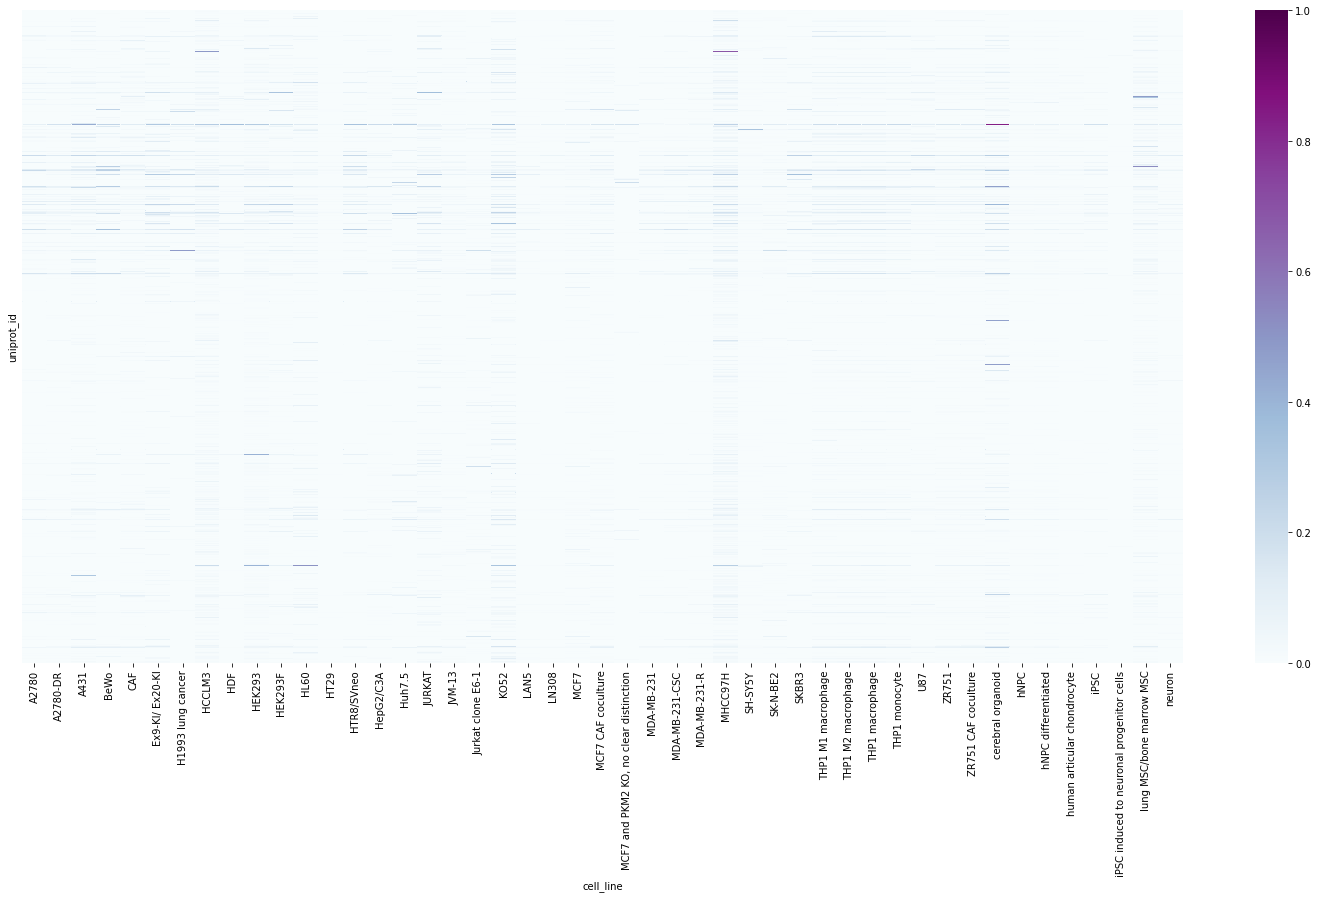

In [30]:
# plot atlas into a heatmap to look at expression patterns over each protein
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
fig, ax = plt.subplots(figsize=(26,12))
datamap = sns.heatmap(minmax_atlas, ax=ax, yticklabels = False,cmap='BuPu')
#datamap.figure.savefig('heatmap_expressionpurple0806.png')
datamap

In [18]:
#del atlas['tissue_name']
#del atlas['assay_id']

# split dataset per tissue
tissues = atlas['tissue_name'].unique()
DataFrameDict = {elem : pd.DataFrame for elem in tissues}
for key in DataFrameDict.keys():
    DataFrameDict[key] = atlas[:][atlas['tissue_name'] == key]

In [19]:
# count number of proteins for each tissue
proteinCount = {}

for key in DataFrameDict.keys():
    tissue = DataFrameDict[key].pop('tissue_name')
    grouped = DataFrameDict[key].groupby('uniprot_id').mean().reset_index()
    count = len(grouped.index)
    proteinCount[key] = str(count)

In [20]:
for key, val in proteinCount.items():
        print (key + ":" + val)

Brain:5967
Blood:4437
Adrenal gland:4740
B-cells:4949
T-cells:4928
Colon:4619
Esophagus:3012
Gall bladder:4032
Small intestine:4428
Heart:4811
Kidney:5300
Liver:6022
Lung:4879
Monocytes:4521
NK-cells:5190
Ovary:5972
Pancreas:5092
Placenta:7204
Prostate:4634
Rectum:4289
Retina:4715
Spinal cord:3561
Testis:8908
Urinary bladder:4228
Dental plaque:2173
PBMC:6468
Sputum:184
Cartilage:531
Ureter:1755
Bone:943
Skin:5787
Follicular fluid:164
Peritoneal dialysis fluid:291
Menstrual fluid:1009
Eye:613
Cerebrospinal fluid:4218
Nasal polyps:2393
Tonsil:5939
Parotid gland:2315
Cervix:2419
Skeletal muscle:4359
Tooth:213
Adipose tissue:4269
Umbilical cord:3891
Urine:1448
Appendix:2007
Bone marrow:1584
Duodenum:3783
Endometrium:3690
fallopian tube/oviduct:3192
lymph node:2234
Pituitary gland:3988
Salivary gland:3719
Smooth muscle:1452
Spleen:2950
Stomach:2748
Thyroid:2862
Anus:1325
Breast:1316
Epidymis:2000
Paratyroid gland:1019
Seminal vesicle:929
Trachea:1381
Uterus:1272


In [ ]:
# write protein counts per tissue to csv file
import csv
with open('Atlas_output/proteinCount_update0806_healthy.csv', 'w') as f:
    writer = csv.writer(f)
    for key, value in proteinCount.items():
        writer.writerow([key, value])

## Now independent of healthy status of the tissue

In [24]:
tissuesql = """SELECT tissue_to_assay.assay_id, tissue.cell_type, tissue.tissue_name FROM tissue_to_assay JOIN tissue ON tissue_to_assay.tissue_id = tissue.tissue_id """
tissueData = pd.read_sql_query(tissuesql,conn)
tissueData.head()
#tissueData
   

,assay_id,cell_type,tissue_name
0,13988,Brain,Brain
1,13989,Brain,Brain
2,13990,Brain,Brain
3,13991,Brain,Brain
4,13992,Brain,Brain


In [26]:
proteinData = pd.read_csv('../Atlas_and_parser/Atlas_output/proteome_nsaf_update0806.csv')
proteinData.shape

(4850267, 3)

In [27]:
atlas = pd.merge(proteinData, tissueData, on = 'assay_id')
atlas.head()
#atlas

,assay_id,uniprot_id,NSAF,cell_type,tissue_name
0,13988,A2RRP1,0.000259,Brain,Brain
1,13988,A5YM72,0.000372,Brain,Brain
2,13988,O00483,0.007590,Brain,Brain
3,13988,O14495,0.000988,Brain,Brain
4,13988,O14594,0.000931,Brain,Brain


In [28]:
#save to csv file,
atlas.to_csv(path_or_buf = '../Atlas_and_parser/Atlas_output/atlas_all_health_statuses_update0806.csv', index = False)


In [29]:
# split dataset per tissue
tissues = atlas['tissue_name'].unique()
DataFrameDict = {elem : pd.DataFrame for elem in tissues}
for key in DataFrameDict.keys():
    DataFrameDict[key] = atlas[:][atlas['tissue_name'] == key]

In [30]:
# count number of proteins for each tissue
proteinCount = {}

for key in DataFrameDict.keys():
    tissue = DataFrameDict[key].pop('tissue_name')
    grouped = DataFrameDict[key].groupby('uniprot_id').mean().reset_index()
    count = len(grouped.index)
    proteinCount[key] = str(count)


In [31]:
for key, val in proteinCount.items():
    print (key + ":" + val)"

SyntaxError: EOL while scanning string literal (<ipython-input-31-4a1ba833cf58>, line 2)

In [ ]:
# write protein counts per tissue to csv file
import csv
with open('Atlas_output/proteinCount_update0806_all_health_statuses.csv', 'w') as f:
    writer = csv.writer(f)
    for key, value in proteinCount.items():
        writer.writerow([key, value])